In [63]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

from typing import List

In [95]:
TREAP_RANDOM_STATS = '../tests/data/bst_vs_rt_random_no_limit.csv'
TREAP_RANDOM_WITH_DUPLICATES_STATS = '../tests/data/bst_vs_rt_random_limit_1000.csv'
TREAP_ORDERED_SEQUENCE_STATS = '../tests/data/bst_vs_rt_worst-case.csv'

## Plots

In [128]:
def plot_test_case_means(df: pd.DataFrame, groupby_field: str, value_fields: List[str]):    
    fig, axe = plt.subplots()

    axe.set_xlabel(groupby_field)
    axe.set_ylabel('height')
    axe.set_yscale('log', basey=10)
    axe.yaxis.set_major_formatter(ticker.ScalarFormatter())
    axe.set_yticks([1, 2, 5, 10, 20, 30, 40, 50, 100, 1000])
    
    for value_field in value_fields:
        plot_method_mean(axe, df, groupby_field, value_field)
    axe.legend()

In [61]:
def plot_method_mean(axe, df: pd.DataFrame,  groupby_field: str, value_field: str):
    data = df.groupby(groupby_field).mean().reset_index()

    plt.plot(data[groupby_field], data[value_field], label=value_field)
    plt.show()

## Random Input

### Create a DataFrame from the stats csv file

In [85]:
df = pd.read_csv(TREAP_RANDOM_STATS)

### Add a column for log(n)

In [86]:
df['log_n'] = df['n'].apply(lambda x: math.log(x) / math.log(2))

### Peeks into the data frame

In [41]:
df.info

<bound method DataFrame.info of           n  height_bst  height_rst      log_n
0       104          12          11   6.700440
1       106          14          19   6.727920
2       104          12          13   6.700440
3       108          16          12   6.754888
4        90          13          11   6.491853
5       108          16          15   6.754888
6        84          13          12   6.392317
7        96          16          12   6.584963
8       100          14          13   6.643856
9       114          13          13   6.832890
10      214          19          16   7.741467
11      202          16          18   7.658211
12      210          16          18   7.714246
13      184          15          15   7.523562
14      204          15          18   7.672425
15      204          14          15   7.672425
16      188          15          19   7.554589
17      210          15          15   7.714246
18      196          15          17   7.614710
19      206          18     

<IPython.core.display.Javascript object>


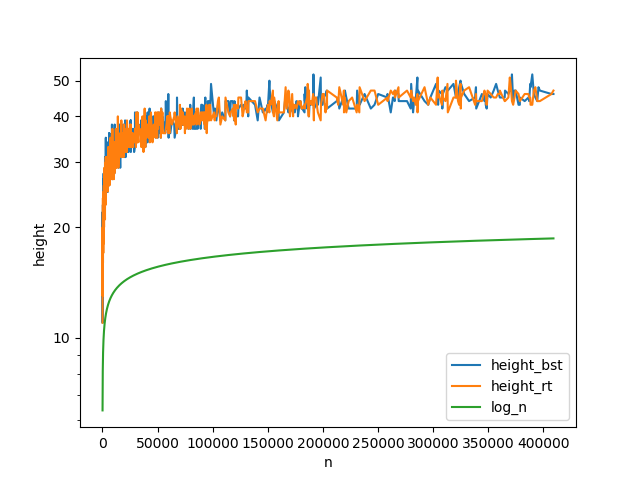

In [87]:
plot_test_case_means(df, 'n', ['height_bst', 'height_rt', 'log_n'])

## Random Input, With Duplicates

### Create a DataFrame from the stats csv file

In [108]:
df_2 = pd.read_csv(TREAP_RANDOM_WITH_DUPLICATES_STATS)

### Add a column for log(n)

In [109]:
df_2['log_n'] = df_2['n'].apply(lambda x: math.log(x) / math.log(2))

<IPython.core.display.Javascript object>


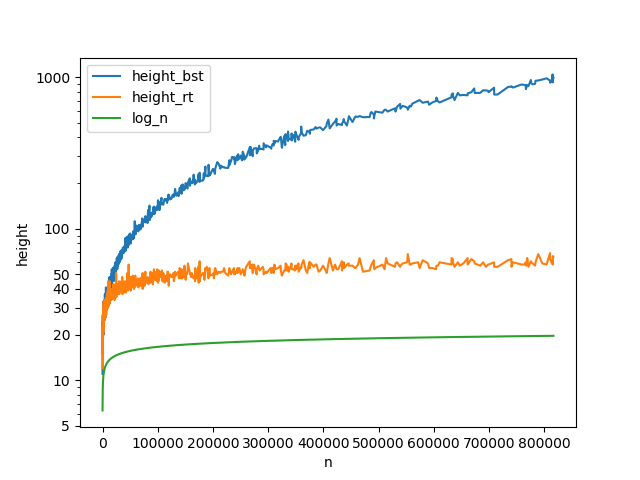

In [119]:
plot_test_case_means(df_2, 'n', ['height_bst', 'height_rt', 'log_n'])

## Ordered Sequence

### Create a DataFrame from the stats csv file

In [123]:
df_3 = pd.read_csv(TREAP_ORDERED_SEQUENCE_STATS)

### Add a column for log(n)

In [124]:
df_3['log_n'] = df_3['n'].apply(lambda x: math.log(x) / math.log(2))

<IPython.core.display.Javascript object>


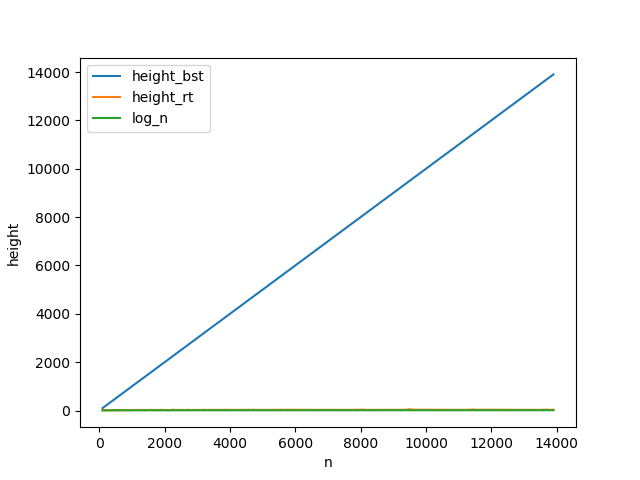

In [127]:
plot_test_case_means(df_3, 'n', ['height_bst', 'height_rt', 'log_n'])